## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\sipsm\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [22]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [23]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Training'
valid_path = 'Testing'


In [24]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [25]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [26]:
  # useful for getting number of output classes
folders = glob('Training/*')

In [27]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [29]:

# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [30]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [31]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2870 images belonging to 4 classes.


In [33]:
import tensorflow as tf
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Training",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 2870 files belonging to 4 classes.


In [34]:
class_names= dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

(50, 224, 224, 3)
[0 0 0 1 2 3 1 3 1 2 3 3 0 1 0 2 1 3 1 0 2 3 1 3 1 1 3 3 2 3 1 3 1 1 2 2 2
 3 0 3 0 0 0 3 3 0 3 3 3 2]


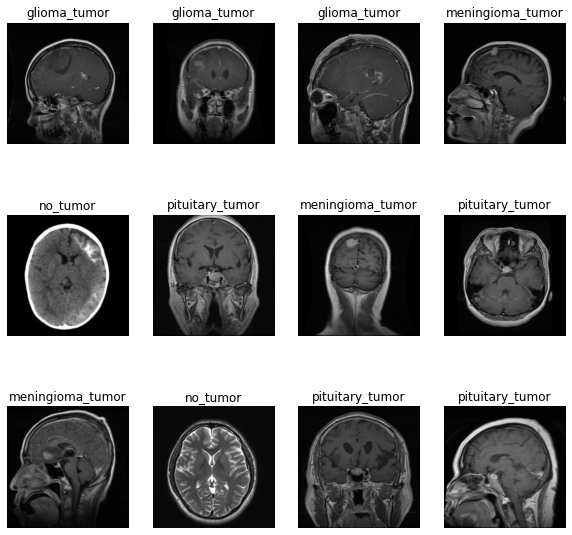

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [36]:
test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


In [37]:
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Testing",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 394 files belonging to 4 classes.


(50, 224, 224, 3)
[3 3 2 0 2 0 1 1 1 2 3 0 1 0 3 1 1 0 1 3 0 2 2 2 1 0 3 1 1 1 2 1 2 2 0 1 2
 3 2 0 3 0 0 0 1 2 3 0 1 2]


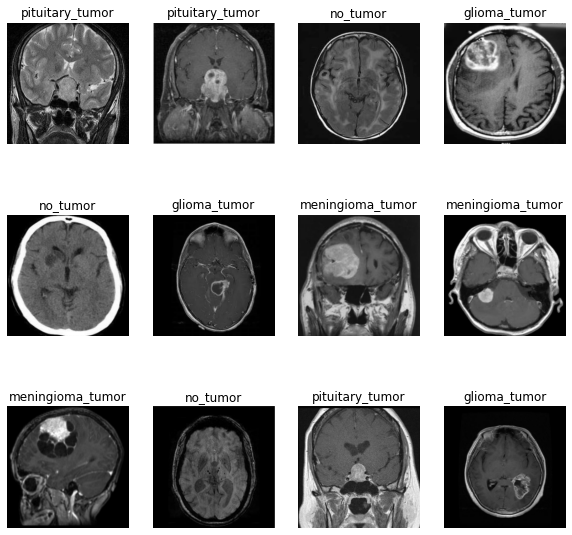

In [39]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [40]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
90/90 [==============================] - 324s 4s/step - loss: 2.7036 - accuracy: 0.6477 - val_loss: 3.6031 - val_accuracy: 0.5102
Epoch 2/15
90/90 [==============================] - 419s 5s/step - loss: 1.2921 - accuracy: 0.7652 - val_loss: 3.7855 - val_accuracy: 0.5178
Epoch 3/15
90/90 [==============================] - 396s 4s/step - loss: 1.6047 - accuracy: 0.7659 - val_loss: 2.7601 - val_accuracy: 0.7157
Epoch 4/15
90/90 [==============================] - 387s 4s/step - loss: 1.5985 - accuracy: 0.7833 - val_loss: 4.0628 - val_accuracy: 0.6142
Epoch 5/15
90/90 [==============================] - 417s 5s/step - loss: 1.5134 - accuracy: 0.8136 - val_loss: 5.1581 - val_accuracy: 0.5812
Epoch 6/15
90/90 [==============================] - 393s 4s/step - loss: 1.3797 - accuracy: 0.8258 - val_loss: 4.7461 - val_accuracy: 0.6497
Epoch 7/15
90/90 [==============================] - 404s 4s/step - loss: 1.3372 - accuracy: 0.8317 - val_loss: 4.2529 - val_accuracy: 0.6726
Epoch 8/15
90

In [41]:
import matplotlib.pyplot as plt

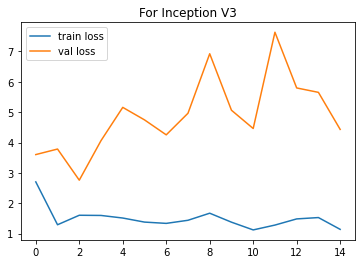

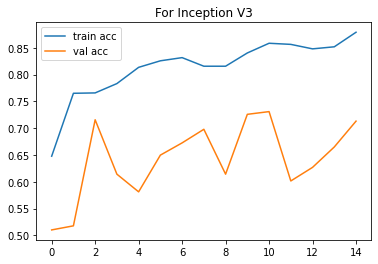

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title("For Inception V3")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("For Inception V3")
plt.show()
plt.savefig('AccVal_acc')

In [43]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [44]:

y_pred = model.predict(test_set)



In [45]:
y_pred

array([[4.9023295e-22, 1.0000000e+00, 1.7887466e-17, 2.1781142e-19],
       [9.9999976e-01, 2.7265352e-09, 9.0962115e-24, 2.7084025e-07],
       [7.3433897e-05, 9.9992573e-01, 7.8744762e-07, 3.6828857e-17],
       ...,
       [9.6123175e-13, 1.0000000e+00, 2.5849483e-18, 6.9494426e-19],
       [7.9082703e-08, 9.8098952e-01, 1.9010412e-02, 1.8493864e-17],
       [8.3975465e-04, 9.9893671e-01, 2.2351881e-04, 1.3367107e-21]],
      dtype=float32)

In [46]:
test_set[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [47]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [48]:
y_pred

array([1, 0, 1, 2, 1, 3, 1, 2, 2, 1, 0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 0,
       0, 3, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 3,
       1, 1, 3, 3, 2, 1, 3, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 3, 3, 1,
       3, 1, 1, 0, 1, 0, 1, 2, 3, 0, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 0, 3,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 2, 1, 1, 1, 3, 3,
       3, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 3, 2, 2, 0, 2, 0, 2, 0, 1, 3, 3,
       2, 1, 1, 2, 1, 2, 3, 1, 3, 2, 1, 1, 1, 0, 0, 1, 0, 3, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 3, 1, 1, 0, 2, 3, 3, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 3, 0, 1, 3, 2, 1, 2, 2,
       0, 0, 1, 1, 1, 3, 1, 2, 0, 1, 1, 0, 1, 3, 2, 3, 1, 1, 1, 1, 3, 2,
       0, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       3, 1, 0, 2, 0, 0, 3, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 1, 3, 1, 2, 2,
       1, 3, 3, 1, 1, 3, 0, 0, 0, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 3, 1, 3, 0, 1, 2, 3, 1, 3, 0, 3, 2,

In [49]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [50]:
dataset=tf.keras.preprocessing.image_dataset_from_directory ("Training",
                                            shuffle=True,
                                           image_size=(IMAGE_SIZE),
                                           batch_size=50
                                           )

Found 2870 files belonging to 4 classes.


In [51]:
def crop_brain_contour(image, plot=False):
    
    import imutils
    import cv2
    from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image,

In [52]:
img=cv2.imread('Training/glioma_tumor/gg (117).jpg')
img=crop_brain_contour(img, plot=True)


NameError: name 'cv2' is not defined